In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
infile = '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-20000501/land_month.zarr.zip'

In [3]:
ds = xr.open_dataset(infile, engine='zarr')

In [8]:
da_spatial = ds['water'].isel({'time': 0, 'ensemble': 0})

In [10]:
da_spatial

<xarray.DataArray 'water' (lat: 90, lon: 144)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    area        (lat, lon) float32 2.758e+08 2.758e+08 2.758e+08 ... nan nan nan
    average_DT  timedelta64[ns] 31 days
    average_T1  datetime64[ns] 2000-05-03
    average_T2  datetime64[ns] 2000-06-03
    ensemble    int64 1
  * lat         (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.3 353.8 356.2 358.8
    time        object 2000-05-16 12:00:00
Attributes:
    cell_methods:   time: mean
    long_name:      mass of water in bucket
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2

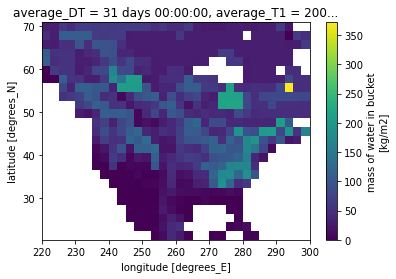

In [12]:
da_spatial.sel({'lat': slice(20, 70), 'lon': slice(220, 300)}).plot()

In [13]:
da_temporal = ds['water'].isel({'ensemble': 0})
da_temporal = da_temporal.sel({'lat': 47.45, 'lon': 237.69}, method='nearest')

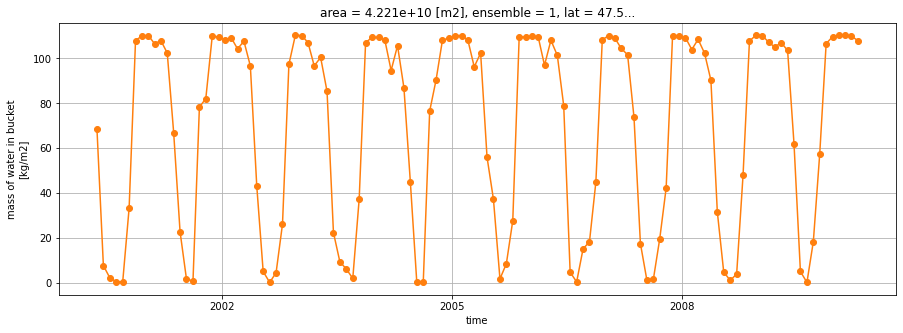

In [34]:
fig = plt.figure(figsize=[15, 5])
ax = fig.add_subplot(111)
da_temporal.plot(ax=ax, marker='o', color='tab:orange')
#da_temporal.isel({'time': slice(0, 12)}).plot(ax=ax, marker='o', color='tab:orange')
#da_temporal.isel({'time': slice(12, 24)}).plot(ax=ax, marker='o', color='tab:blue')
#da_temporal.isel({'time': slice(24, 36)}).plot(ax=ax, marker='o', color='tab:red')
#da_temporal.isel({'time': slice(36, 48)}).plot(ax=ax, marker='o', color='tab:green')
ax.grid(True)

## Water / soil moisture data

In [2]:
summer_water_file = '/g/data/xv83/dbi599/seatac/data/water_cafe-c5-d60-pX-f6_19950501-20201101_JJA-mean_seatac.zarr.zip'
ds_summer_water = xr.open_dataset(summer_water_file, engine='zarr')

In [3]:
ds_summer_water

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 52, lead_time: 10)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-05-16 00:00:00 ... 2020-11-16 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8 9
    time       (lead_time, init_date) object ...
Data variables:
    water      (init_date, lead_time, ensemble) float64 ...
Attributes:
    filename:   land_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Oct 19 14:58:36 2022: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

The first lead time for May starts comes from an incomplete year (and needs to be removed) and the last lead time from Nov starts.

In [4]:
ds_summer_water_may = ds_summer_water.sel({'init_date': ds_summer_water['init_date'].dt.month == 5})
ds_summer_water_may = ds_summer_water_may.isel({'lead_time': slice(1, 10)})
ds_summer_water_may

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 26, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-05-16 00:00:00 ... 2020-05-16 00:00:00
  * lead_time  (lead_time) int64 1 2 3 4 5 6 7 8 9
    time       (lead_time, init_date) object 1996-05-16 12:00:00 ... 2029-05-...
Data variables:
    water      (init_date, lead_time, ensemble) float64 21.22 20.18 ... 21.85
Attributes:
    filename:   land_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Oct 19 14:58:36 2022: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

In [5]:
ds_summer_water_nov = ds_summer_water.sel({'init_date': ds_summer_water['init_date'].dt.month == 11})
ds_summer_water_nov = ds_summer_water_nov.isel({'lead_time': slice(0, 9)})
ds_summer_water_nov

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 26, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-11-16 00:00:00 ... 2020-11-16 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
    time       (lead_time, init_date) object 1995-11-16 00:00:00 ... 2028-11-...
Data variables:
    water      (init_date, lead_time, ensemble) float64 10.7 21.83 ... 13.18
Attributes:
    filename:   land_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Oct 19 14:58:36 2022: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

## TXx data

In [6]:
txx_file = '/g/data/xv83/dbi599/seatac/data/tasmax_cafe-c5-d60-pX-f6_19950501-20201101_A-DEC-max_seatac.zarr.zip'
ds_txx = xr.open_dataset(txx_file, engine='zarr')

In [7]:
ds_txx_may = ds_txx.sel({'init_date': ds_summer_water['init_date'].dt.month == 5})
ds_txx_may

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 26, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-05-01 00:00:00 ... 2020-05-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
    time       (lead_time, init_date) object ...
Data variables:
    tasmax     (init_date, lead_time, ensemble) float32 ...
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Thu Dec 02 16:08:28 2021: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

In [8]:
ds_txx_nov = ds_txx.sel({'init_date': ds_summer_water['init_date'].dt.month == 11})
ds_txx_nov

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 26, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-11-01 00:00:00 ... 2020-11-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
    time       (lead_time, init_date) object ...
Data variables:
    tasmax     (init_date, lead_time, ensemble) float32 ...
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Thu Dec 02 16:08:28 2021: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

## RMSE data

In [9]:
rmse_df = pd.read_csv('/g/data/xv83/dbi599/seatac/figures/seatac_z500_rmse.csv')

In [10]:
rmse_df['time'] = pd.to_datetime(rmse_df['time'])

In [11]:
rmse_df

,time,ensemble,rmse,tasmax,forecast
0,1995-06-01 12:00:00,1,170.983630,17.900177,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
1,1995-06-02 12:00:00,1,165.051530,18.975342,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
2,1995-06-03 12:00:00,1,153.706710,20.434600,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
3,1995-06-04 12:00:00,1,148.680950,20.269806,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
4,1995-06-05 12:00:00,1,149.765810,22.445526,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
...,...,...,...,...,...
4592635,2030-08-27 12:00:00,96,123.260980,23.570800,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-2020110...
4592636,2030-08-28 12:00:00,96,127.378050,20.826752,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-2020110...
4592637,2030-08-29 12:00:00,96,125.334990,20.304565,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-2020110...
4592638,2030-08-30 12:00:00,96,122.511894,20.812683,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-2020110...


## Put it together

In [12]:
def process_point(ds_txx, ds_summer_water, init_date_index, lead_time_index, ensemble_index):
    """Process single data point"""
    
    init_year = str(ds_txx['init_date'].values[init_date_index].year)
    init_month = str(ds_txx['init_date'].values[init_date_index].month).zfill(2)
    init_day = str(ds_txx['init_date'].values[init_date_index].day).zfill(2)

    forecast = f'/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-{init_year}{init_month}{init_day}/atmos_isobaric_daily.zarr.zip'

    init_selection = rmse_df['forecast'] == forecast
    ensemble_selection = rmse_df['ensemble'] == ensemble_index + 1
    lead_selection = rmse_df['time'].dt.year == int(init_year) + lead_time_index + 1

    rmse_df_subset = rmse_df[init_selection & ensemble_selection & lead_selection]
    rmse_selection = rmse_df_subset.loc[rmse_df_subset['tasmax'].idxmax()]
    #rmse_selection = rmse_df_subset.iloc[(rmse_df_subset['tasmax'] - txx).abs().argsort(), :].iloc[0]
    
    txx = float(ds_txx['tasmax'].isel({'ensemble': ensemble_index, 'init_date': init_date_index, 'lead_time': lead_time_index}).values)
    water = float(ds_summer_water['water'].isel({'ensemble': ensemble_index, 'init_date': init_date_index, 'lead_time': lead_time_index}).values)
    
    #assert np.isclose(rmse_selection['tasmax'], txx)
    #if not np.isclose(rmse_selection['tasmax'], txx):
    #    print(init_month, init_date_index, lead_time_index, ensemble_index)
    #    print(rmse_selection['tasmax'], txx)
    rmse = rmse_selection['rmse']
    
    return txx, water, rmse

In [ ]:
rmse_list = []
txx_list = []
water_list = []
n_init_dates, n_lead_times, n_ensembles = ds_txx_may['tasmax'].shape
for init_date_index in range(n_init_dates):
    print('init date:', init_date_index)
    for lead_time_index in range(n_lead_times):
        print('lead time:', lead_time_index)
        for ensemble_index in range(n_ensembles):
            txx_may, water_may, rmse_may = process_point(
                ds_txx_may,
                ds_summer_water_may,
                init_date_index,
                lead_time_index,
                ensemble_index,
            )
            if rmse_may:
                txx_list.append(txx_may)
                water_list.append(water_may)
                rmse_list.append(rmse_may)
            txx_nov, water_nov, rmse_nov = process_point(
                ds_txx_nov,
                ds_summer_water_nov,
                init_date_index,
                lead_time_index,
                ensemble_index,
            )
            if rmse_nov:
                txx_list.append(txx_nov)
                water_list.append(water_nov)
                rmse_list.append(rmse_nov)
            
rmse_ds = pd.Series(rmse_list)
txx_ds = pd.Series(txx_list)
water_ds = pd.Series(water_list)

df = pd.concat([txx_ds, water_ds, rmse_ds], join='inner', axis=1)
df.columns = ['txx', 'water', 'rmse']

init date: 0
lead time: 0
lead time: 1


In [108]:
#plt.figure(figsize=(8, 8))
#sns.scatterplot(data=df, x='rmse', y='txx', hue='water', palette='cividis_r')
#sns.kdeplot(data=df, x='rmse', y='txx')
#plt.show()

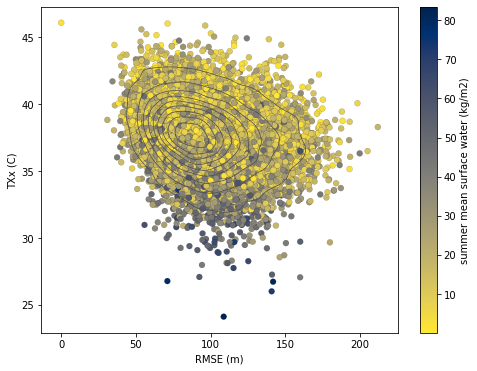

In [107]:
fig = plt.figure(figsize=[8, 6])
ax = plt.axes()

x = np.array(rmse_list)
y = np.array(txx_list)

plt.scatter(
    x,
    y,
    c=water_list,
    edgecolors='black',
    linewidths=0.1,
    cmap='cividis_r'
)
cbar = plt.colorbar()
cbar.set_label('summer mean surface water (kg/m2)')

#p = np.polyfit(x, y, 1)
#plt.plot(x, p[0]*x+p[1], 'tab:grey')
sns.kdeplot(data=df, x='rmse', y='txx', color='0.3', linewidths=0.7)

plt.xlabel('RMSE (m)')
plt.ylabel('TXx (C)')

plt.savefig(
    '/g/data/xv83/dbi599/seatac/figures/seatac_scatter-rmse-txx-water.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=300,
)

In [ ]:
density, xedges, yedges = np.histogram2d(x, y, bins=1000)
xcentres = (xedges[:-1] + xedges[1:]) / 2
ycentres = (yedges[:-1] + yedges[1:]) / 2

bigx, bigy = np.meshgrid(xcentres, ycentres)
plt.contour(bigx, bigy, density)

In [86]:
#plt.figure(figsize=(8, 8))
#sns.lmplot(data=df, x='rmse', y='txx', hue='water')
#plt.show()

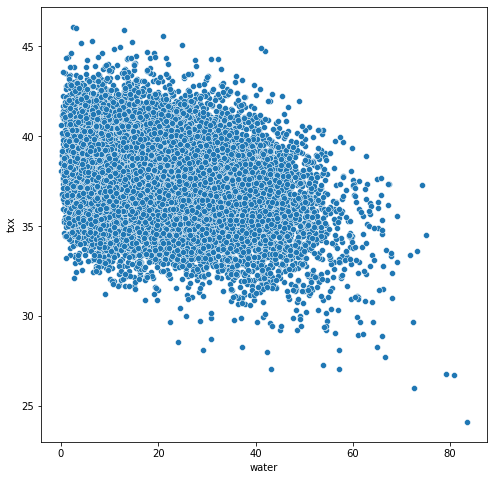

In [87]:
plt.figure(figsize=(8, 8))
#sns.regplot(data=df, x='water', y='txx', scatter=False, color='navy')
sns.scatterplot(data=df, x='water', y='txx')
plt.show()